## Objective

The objective of this notebook is to **train and evaluate machine learning models** to predict **concrete compressive strength** using various regression techniques. Additionally, the notebook focuses on providing **model interpretability** through tools like **Explainable Boosting Machine (EBM)** and **SHAP**. The goal is to ensure model transparency and fairness by understanding the impact of different features on predictions and applying fairness analysis using **Fairlearn**.

### Specific Objectives:

1. **Data Exploration and Preprocessing**:
   - Load the dataset, perform exploratory data analysis (EDA), check for missing values, and visualize distributions.
   - Conduct correlation analysis using a heatmap to understand relationships between features.

2. **Feature Scaling and Splitting**:
   - Standardize the features to improve the performance of machine learning models.
   - Split the data into training and testing sets to evaluate model performance.

3. **Train and Evaluate Models**:
   - Train two regression models: **Linear Regression** and **Random Forest Regressor**.
   - Evaluate the models using metrics such as **Mean Squared Error (MSE)** and **R-squared**.
   - Compare model performances to determine which model best fits the data.

4. **Model Interpretability**:
   - Use the **Explainable Boosting Machine (EBM)** to interpret the model's predictions and understand which features contribute most to the predictions.
   - Apply **SHAP** (Shapley Additive Explanations) to analyze the feature contributions for individual predictions in the **Random Forest** model.

5. **Fairness Analysis**:
   - Perform fairness analysis using **Fairlearn** to evaluate how well the model performs across different subgroups, potentially focusing on the **water content** feature.
   - Analyze if the model exhibits any bias against certain groups and explore potential ways to mitigate this bias.

6. **Global and Local Interpretations**:
   - Visualize both **global feature importance** and **local explanations** for specific predictions to provide transparency in how the model arrives at its results.

This comprehensive approach ensures that the machine learning models are both **accurate** and **fair**, while providing **transparent insights** into the model's decision-making process.


Missing values per column:
 cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Descriptive Statistics:
             cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

     

<Figure size 1200x1000 with 0 Axes>

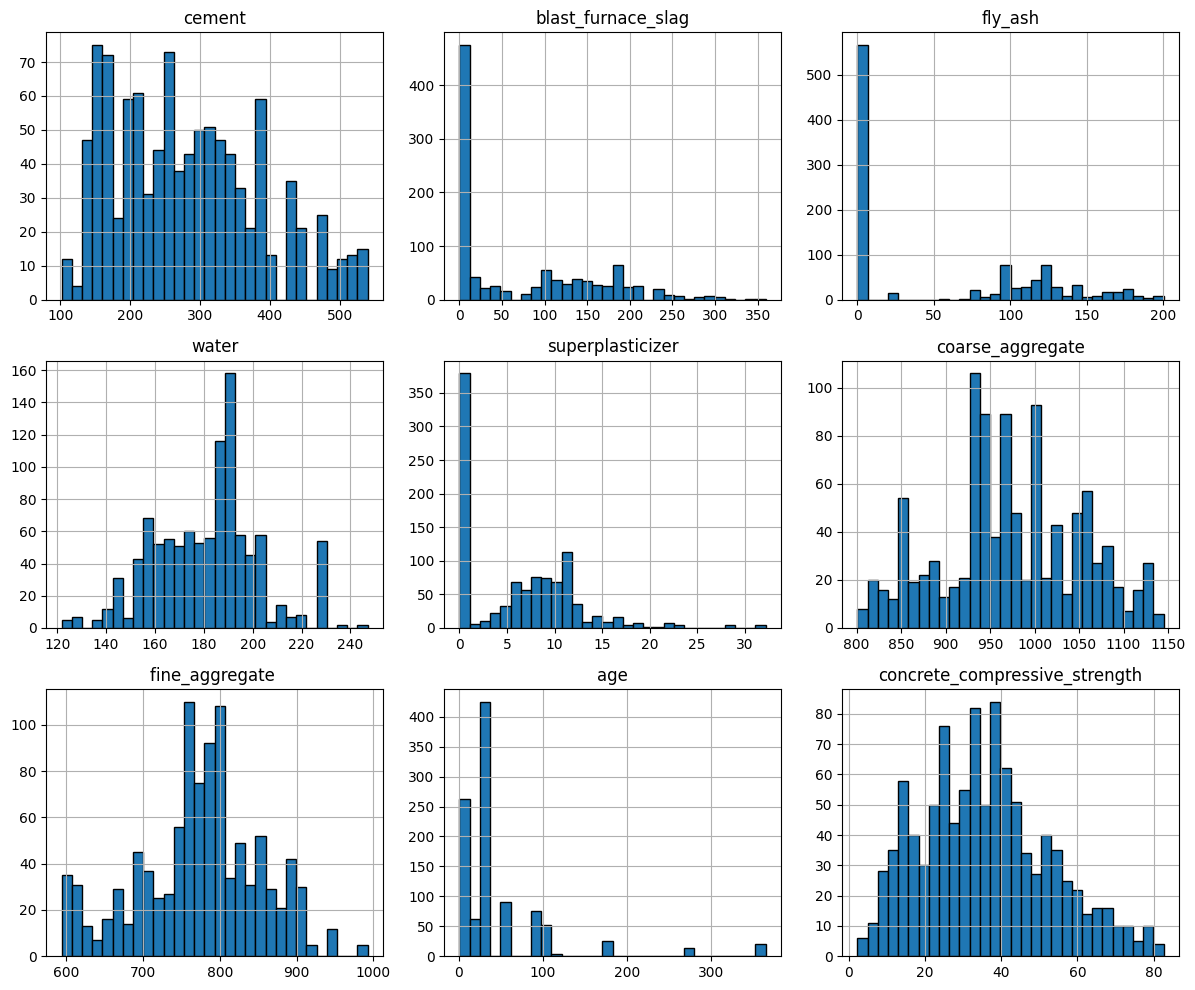

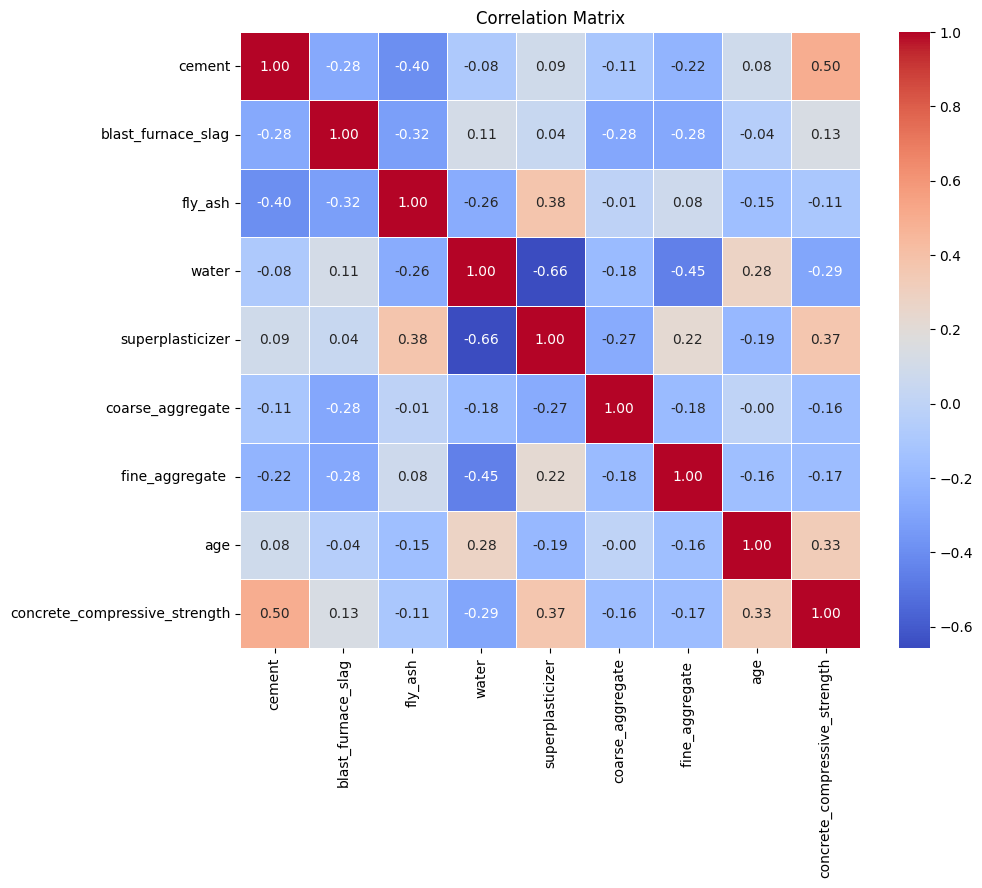


Data has been split into training and testing sets.


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'concrete_data.csv'  # Update this to the path where your dataset is saved in Colab
concrete_data = pd.read_csv(file_path)

# Check for missing values
missing_values = concrete_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Get the basic descriptive statistics of the dataset
statistics = concrete_data.describe()
print("\nDescriptive Statistics:\n", statistics)

# Set up the figure for multiple histograms
plt.figure(figsize=(12, 10))

# Plot histograms for each numerical feature
concrete_data.hist(bins=30, figsize=(12, 10), layout=(3, 3), edgecolor='black')

plt.tight_layout()
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = concrete_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Feature scaling (Standardization)
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and target (y)
X = concrete_data.drop(columns=['concrete_compressive_strength'])
y = concrete_data['concrete_compressive_strength']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData has been split into training and testing sets.")


### Model Comparison

Two models were trained to predict **concrete compressive strength**: **Linear Regression** and **Random Forest Regressor**.

- **Linear Regression**:
  - **MSE**: 95.97
  - **R²**: 0.63

- **Random Forest Regressor**:
  - **MSE**: 29.94
  - **R²**: 0.88

The **Random Forest Regressor** significantly outperforms **Linear Regression**, with much lower errors (MSE: 29.94 vs. 95.97) and a higher R² score (0.88 vs. 0.63). This suggests that the relationship between features and compressive strength is likely non-linear, making Random Forest a better choice for this task.


In [ ]:
# Import required libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Linear Regression Model ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lin_reg.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Linear Regression ---")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

# --- Random Forest Regressor Model ---
# Initialize the random forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor ---")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# --- Compare Model Performance ---
print("\nModel Comparison:")
print(f"Linear Regression MSE: {mse_lr:.2f}, R-squared: {r2_lr:.2f}")
print(f"Random Forest Regressor MSE: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")



--- Linear Regression ---
Mean Squared Error: 95.97
R-squared: 0.63

--- Random Forest Regressor ---
Mean Squared Error: 29.94
R-squared: 0.88

Model Comparison:
Linear Regression MSE: 95.97, R-squared: 0.63
Random Forest Regressor MSE: 29.94, R-squared: 0.88


In [ ]:
!pip install interpret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 22.2 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=

In [ ]:
# Import InterpretML library
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.blackbox import ShapKernel
from interpret import show

# --- Explainable Boosting Machine (EBM) ---
# Train an EBM model
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

# Evaluate the EBM model
y_pred_ebm = ebm.predict(X_test)
mse_ebm = mean_squared_error(y_test, y_pred_ebm)
r2_ebm = r2_score(y_test, y_pred_ebm)

print("\n--- Explainable Boosting Machine ---")
print(f"Mean Squared Error: {mse_ebm:.2f}")
print(f"R-squared: {r2_ebm:.2f}")

# Interpret the EBM model
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])  # Explain individual predictions
show(ebm_local)  # This will display an interactive plot for local explanations

# --- SHAP Interpretation for Random Forest ---
# Initialize the SHAP explainer for Random Forest
explainer = ShapKernel(rf_reg.predict, X_train)

# Calculate SHAP values for a few test samples
shap_values = explainer.explain_local(X_test[:5])

# Visualize SHAP values for Random Forest
show(shap_values)



--- Explainable Boosting Machine ---
Mean Squared Error: 20.39
R-squared: 0.92


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Let's map the feature indices to their actual column names from the dataset
feature_names = list(concrete_data.columns[:-1])  # Excluding the target variable

# Create a mapping from feature indices to actual feature names
feature_mapping = {f"feature_{str(i).zfill(4)}": feature_names[i] for i in range(len(feature_names))}

feature_mapping


{'feature_0000': 'cement',
 'feature_0001': 'blast_furnace_slag',
 'feature_0002': 'fly_ash',
 'feature_0003': 'water',
 'feature_0004': 'superplasticizer',
 'feature_0005': 'coarse_aggregate',
 'feature_0006': 'fine_aggregate ',
 'feature_0007': 'age'}

In [ ]:
feature_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water',
                 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']


### Explanation of Global and Local Explanations for Concrete Strength Prediction

#### 1. Global Explanation (Water Feature)

This graph explains the **global effect** of the feature **water** on the model’s predictions. It shows how different values of water impact the predicted compressive strength of the concrete.

- **X-axis (Water)**: Represents different values of water, which are scaled/standardized.
- **Y-axis (Score)**: This shows how much the water feature contributes to the predicted compressive strength. Positive scores push the prediction up (increase strength), while negative scores push the prediction down (decrease strength).
- **Density Plot (Orange Bars)**: This shows the distribution of water values in the dataset. Taller bars mean more data points with those water values.

**Interpretation**:
- When water values are low (on the left side of the X-axis), water has a **positive impact** on the strength, increasing the predicted value.
- When water values are high (on the right side of the X-axis), water has a **negative impact** on the strength, reducing the predicted value.
- This makes sense because, in real-world concrete design, too much water weakens the concrete, while too little water can also affect strength negatively.

#### 2. Local Explanation (Specific Prediction)

This graph explains **why the model made a specific prediction** for a particular concrete mix in the dataset.

- **Actual Value**: The actual compressive strength was 10.54 MPa.
- **Predicted Value**: The model predicted 10.22 MPa, which is very close to the actual value, with a small residual error of 0.322.

**Bar Chart Explanation**:
- **Blue Bars**: These features had a **negative impact** on the prediction (they pushed the predicted strength down).
  - Example: **Cement** had a -1.30 contribution, meaning it lowered the predicted compressive strength.
  - **Coarse aggregate** and **fly ash** also reduced the predicted value.
- **Orange Bars**: These features had a **positive impact** on the prediction (they pushed the predicted strength up).
  - Example: **Fly ash** had a positive contribution of 1.95, meaning it increased the prediction.

**Feature Interactions**: The graph also shows how some features interact with each other. For example, **cement & age** shows the combined effect of both features on the prediction, although the impact is small here.

---

### Example of Logical Sense:

Let’s take the **global water feature graph** as an example:
- In the real world, concrete needs an optimal amount of water for maximum strength. If the water content is too high, it will dilute the concrete mix and reduce the compressive strength. This is why the graph shows a **negative score** for high water values.
- On the other hand, if the water content is too low, it can also reduce the workability of the concrete, but in this case, at moderate or low water values, the graph shows a **positive contribution** to compressive strength, meaning that within a certain range, less water can increase strength.

Thus, the behavior seen in the graph aligns with real-world concrete mixing principles, which makes the model’s predictions logically sound.


In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Train the EBM model with feature names passed to the constructor
ebm = ExplainableBoostingRegressor(feature_names=feature_names)
ebm.fit(X_train, y_train)

# Generate local explanations
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])

# View the interactive local explanation with proper feature names
show(ebm_local)


In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Your feature names list
feature_names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water',
                 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']

# Train the EBM model with feature names
ebm = ExplainableBoostingRegressor(feature_names=feature_names)
ebm.fit(X_train, y_train)

# --- Local Explanation (for individual predictions) ---
# Generate local explanations for the first 5 samples in the test set
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])

# View the interactive local explanation
show(ebm_local)

# --- Global Explanation (feature importance across the entire dataset) ---
# Generate the global explanation
ebm_global = ebm.explain_global()

# View the interactive global explanation
show(ebm_global)


In [ ]:
ebm_local = ebm.explain_local(X_test[5:10], y_test[5:10])
show(ebm_local)


### SHAP (Shapley Additive Explanations) Analysis

The SHAP plot shown above visualizes the impact of different features on the model’s output for the first 5 test samples. **SHAP values** explain how much each feature contributes to the prediction for a given instance, whether increasing or decreasing the predicted value.

- **Feature importance**: The plot shows the most impactful features based on their SHAP values. The x-axis represents the SHAP value, indicating how much each feature is contributing to the model’s output (positive or negative influence).
- **Color**: The color represents the feature values (blue = low, red = high).
  - For example, in this case:
    - **Age** has both positive and negative contributions depending on whether the value is high (red) or low (blue).
    - **Cement** and **blast_furnace_slag** are important features, with contributions spanning both positive and negative sides depending on the value for each specific instance.
  
- **Key takeaway**:
  - **Age** and **cement** appear to be critical features influencing the model’s predictions.
  - The SHAP values allow us to better understand how different features are contributing to the **Random Forest model**'s predictions, providing interpretability for individual predictions.

In summary, this SHAP analysis helps explain the **black-box model** (Random Forest) by showing the feature-wise contributions for each prediction, ensuring transparency in the decision-making process of the model.


In [ ]:
from interpret.blackbox import ShapKernel
from interpret import show
import numpy as np

# Train a black-box model (Random Forest in this case)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Explain the black-box model with SHAP
# Now pass the model (not just the prediction function)
shap_explainer = ShapKernel(rf_model, data=X_train)

# Generate SHAP explanations for the first 5 test samples
shap_local = shap_explainer.explain_local(X_test[:5])

# Show SHAP explanations
show(shap_local)


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import shap

# Reduce the background dataset size by random sampling
background_data = shap.sample(X_train, 100)  # Sampling 100 data points

# Create the SHAP explainer with reduced background data
shap_explainer = ShapKernel(rf_model, data=background_data)

# Generate SHAP explanations for the first 5 test samples
shap_local = shap_explainer.explain_local(X_test[:5])

# Show SHAP explanations
show(shap_local)


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import shap

# Train a black-box model (Random Forest in this case)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Use a small random sample from the training data as background for SHAP
background_data = shap.sample(X_train, 100)  # Use 100 samples as background data

# Create a SHAP explainer using the model and background data
shap_explainer = shap.KernelExplainer(rf_model.predict, background_data)

# Generate SHAP values for the first 5 samples from the test set
shap_values = shap_explainer.shap_values(X_test[:5])

# Now let's display the SHAP values
print("SHAP values computed:", shap_values)


  0%|          | 0/5 [00:00<?, ?it/s]

SHAP values computed: [[ -0.52079665   3.42657414   0.18541406  -3.31725773  -1.69988077
    0.44151495   3.76254443  11.57282728]
 [  7.71874693   4.14820448   0.54934934   2.87976761   3.49880386
    0.3174257    0.22954065 -16.39059886]
 [ 10.17657142   6.34802494   1.23381965   8.10822581   1.87236647
    0.7441881    0.81397518   4.19896813]
 [  8.01544421   4.56844107   0.53768872   3.00899649   3.1883547
    0.44294424   0.50073972 -22.95356945]
 [-17.72528212  -4.43219032  -0.32054488  -2.74213446   0.64622578
    0.33207953  -0.9229062   -0.3644076 ]]


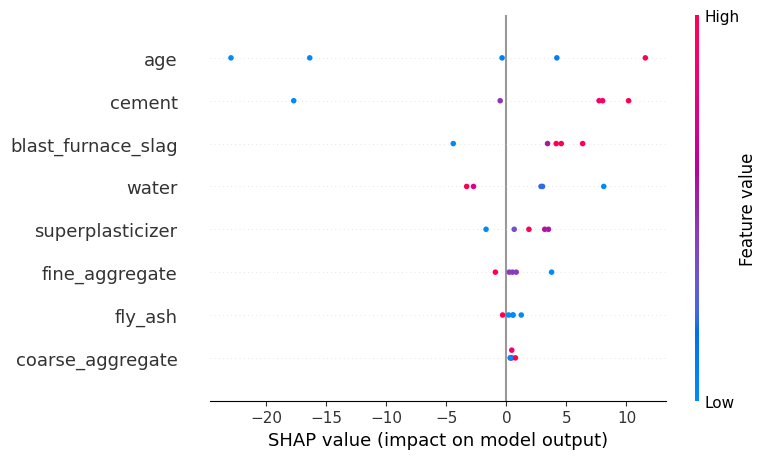

In [ ]:
# Visualize the SHAP summary plot for the first 5 predictions
shap.summary_plot(shap_values, X_test[:5], feature_names=feature_names)


  0%|          | 0/5 [00:00<?, ?it/s]

[[ -0.32370813   2.78429252   0.22706591  -3.32989906  -1.98240617
    0.34896734   4.53245041  11.96406859]
 [  7.95758678   4.56102675   0.47963817   3.07908869   3.21767112
    0.195804     0.27465418 -16.32653829]
 [ 10.45991196   6.28935242   1.17365063   8.06788817   1.89956978
    0.57543171   0.75422784   3.9614989 ]
 [  8.10582458   5.00678507   0.48884258   3.15812068   2.95370542
    0.35031941   0.37892818 -23.14059452]
 [-17.80543009  -4.62402634  -0.4606005   -2.82624556   0.71263017
    0.24581397  -1.11043452  -0.76407573]]


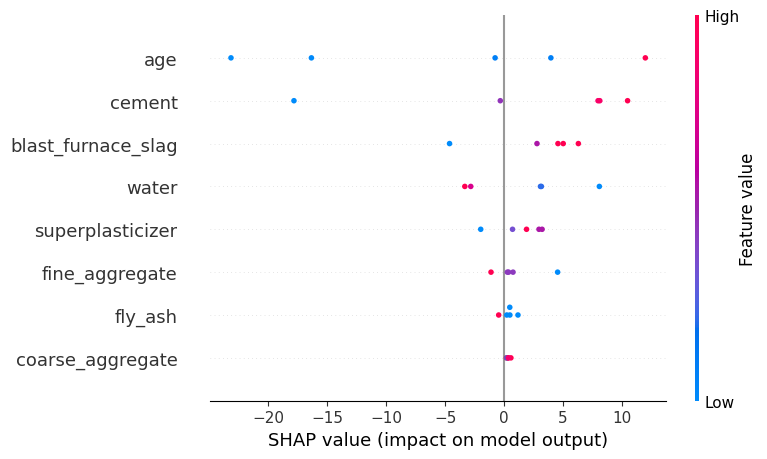

In [ ]:
import shap
import numpy as np

# Train a black-box model (Random Forest in this case)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Use a small random sample from the training data as background for SHAP
background_data = shap.sample(X_train, 100)  # Use 100 samples as background data

# Create a SHAP explainer using SHAP's KernelExplainer
shap_explainer = shap.KernelExplainer(rf_model.predict, background_data)

# Generate SHAP values for the first 5 samples in the test set
shap_values = shap_explainer.shap_values(X_test[:5])

# Print the SHAP values for the first 5 samples
print(shap_values)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test[:5], feature_names=feature_names)


### Fairness Analysis by Water Content Group

In this section, we analyzed the model’s performance across different **water content groups** to assess whether the model treats these groups fairly. The dataset was divided into three water content categories:
- **Low Water Content**
- **Medium Water Content**
- **High Water Content**

We used the **Mean Squared Error (MSE)** as the evaluation metric to measure the model's prediction errors for each group.

#### Results:
- **High Water Content Group**: MSE = 19.19
- **Low Water Content Group**: MSE = 46.16
- **Medium Water Content Group**: MSE = 25.06

#### Interpretation:
- The model performs **best** for the **High Water Content Group**, with an MSE of 19.19, indicating lower prediction errors for this group.
- The model performs **worst** for the **Low Water Content Group**, with a significantly higher MSE of 46.16, indicating that the model struggles to make accurate predictions for samples with low water content.
- The **Medium Water Content Group** has an intermediate MSE of 25.06, suggesting moderate prediction errors.

#### Conclusion:
This analysis highlights a potential **fairness issue** in the model. The **Low Water Content Group** exhibits much higher prediction errors compared to the other groups, indicating that the model may be biased or less effective at predicting for this group. Such disparities in performance suggest that the model is not treating all water content groups equally, which is a typical fairness concern.

#### Next Steps:
To address this fairness issue, we could:
1. Investigate why the model performs worse for the low water content group (e.g., data imbalance or complex relationships in this group).
2. Apply techniques such as model retraining, hyperparameter tuning, or fairness-aware algorithms to improve performance across all groups, ensuring that the model makes more balanced and fair predictions.



In [ ]:
!pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Reload the dataset
file_path = 'concrete_data.csv'
data = pd.read_csv(file_path)

# Splitting the data into features and target
X = data.drop(columns=["concrete_compressive_strength"])
y = data["concrete_compressive_strength"]

# Now split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


water
High      19.188389
Low       46.161066
Medium    25.064152
Name: mean_squared_error, dtype: float64


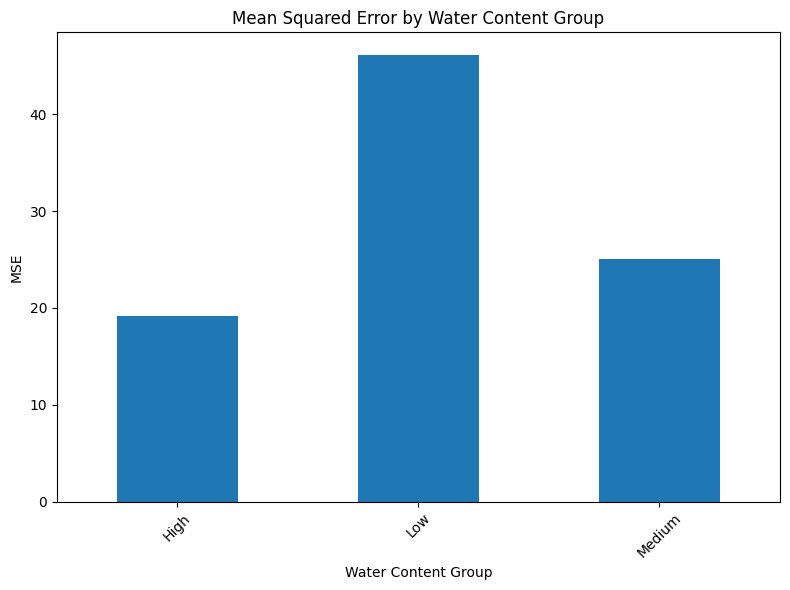

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from fairlearn.metrics import MetricFrame
from sklearn.metrics import mean_squared_error
import numpy as np

# Train a Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = rf_model.predict(X_test)

# Group water content into categories (Low, Medium, High)
bins = [-np.inf, X_test['water'].quantile(0.33), X_test['water'].quantile(0.66), np.inf]
water_groups = pd.cut(X_test['water'], bins=bins, labels=["Low", "Medium", "High"])

# Use Fairlearn's MetricFrame to compute the fairness metric for each water group
metric_frame = MetricFrame(metrics=mean_squared_error,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=water_groups)

# Display MSE for each water group
mse_by_water_group = metric_frame.by_group
print(mse_by_water_group)

# Plot the MSE for each water group
import matplotlib.pyplot as plt
mse_by_water_group.plot(kind='bar', figsize=(8, 6))
plt.title("Mean Squared Error by Water Content Group")
plt.ylabel("MSE")
plt.xlabel("Water Content Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Squared Error by Water Group:
water
High      19.188389
Low       46.161066
Medium    25.064152
Name: mean_squared_error, dtype: float64


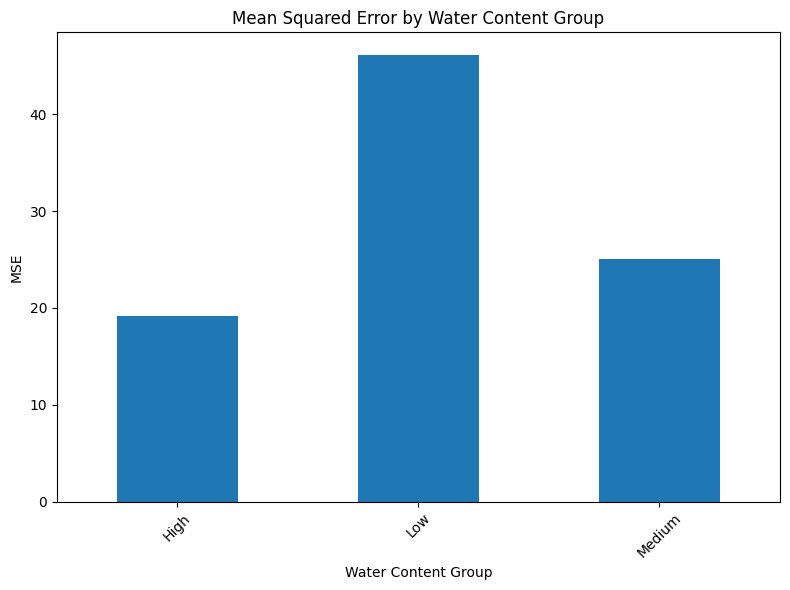

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import mean_squared_error

# Use Fairlearn's MetricFrame to compute MSE across water groups
metric_frame = MetricFrame(metrics=mean_squared_error,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=water_groups)

# Display MSE for each water group
print("Mean Squared Error by Water Group:")
print(metric_frame.by_group)

# Plot the MSE for each water group
import matplotlib.pyplot as plt
metric_frame.by_group.plot(kind='bar', figsize=(8, 6))
plt.title("Mean Squared Error by Water Content Group")
plt.ylabel("MSE")
plt.xlabel("Water Content Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
